In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# The dataset is now loaded and split into training and testing sets
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test data shape:", x_test.shape)  # (10000, 28, 28)
print("Test labels shape:", y_test.shape)  # (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


1. Normalize Input Data (Scale Pixel Values to [0, 1])

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

2. Flatten the 28×28 Images (For Dense Neural Networks)

In [5]:
x_train = x_train.reshape(x_train.shape[0], -1)  # (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1)     # (10000, 784)

# Verify shapes
print("Training data shape:", x_train.shape)  # (60000, 784)
print("Test data shape:", x_test.shape)      # (10000, 784)

Training data shape: (60000, 784)
Test data shape: (10000, 784)


3. Model Architecture

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    # Input layer (flattening is already done in preprocessing)
    Dense(256, activation='relu', input_shape=(784,)),  # 1st Hidden Layer (256 neurons)
    BatchNormalization(),  # Normalizes activations
    Dropout(0.3),  # Randomly drops 30% of neurons to prevent overfitting

    Dense(128, activation='relu'),  # 2nd Hidden Layer (128 neurons)
    BatchNormalization(),  # Normalizes activations
    Dropout(0.3),  # Randomly drops 30% of neurons

    # Optional 3rd Hidden Layer (uncomment if needed)
    # Dense(64, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.2),

    # Output Layer (10 classes, softmax for probabilities)
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Default learning rate
    loss='sparse_categorical_crossentropy',  # Since labels are integers (not one-hot)
    metrics=['accuracy']
)

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,682 (924.54 KB)

 Trainable params: 235,914 (921.54 KB)

 Non-trainable params: 768 (3.00 KB)

4. 4. Training the Model

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model (if not already done)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model (with 20% validation split)
# Train for exactly 20 epochs (no early stopping)
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,  # Will run all 20 epochs regardless
    validation_split=0.2,
    verbose=1  # Shows progress bar
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9808 - loss: 0.0592 - val_accuracy: 0.9783 - val_loss: 0.0771
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9804 - loss: 0.0627 - val_accuracy: 0.9792 - val_loss: 0.0786
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9819 - loss: 0.0592 - val_accuracy: 0.9787 - val_loss: 0.0780
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9836 - loss: 0.0496 - val_accuracy: 0.9803 - val_loss: 0.0743
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9829 - loss: 0.0536 - val_accuracy: 0.9798 - val_loss: 0.0732
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.9803 - val_loss: 0.0687
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9846 - loss: 0.0454 - val_accuracy: 0.9797 - val_loss: 0.0766
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9848 - loss: 0.0457 - val_accu

5. Visualization (Training Curves)

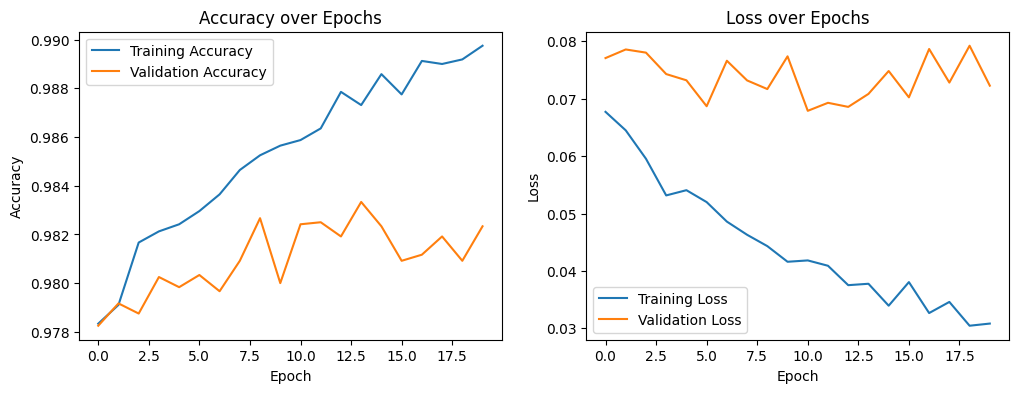

In [10]:
import matplotlib.pyplot as plt

# Plot training vs. validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Plot training vs. validation loss (optional)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

6. Evaluation (Test Set Performance)


Test Accuracy: 0.9842
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


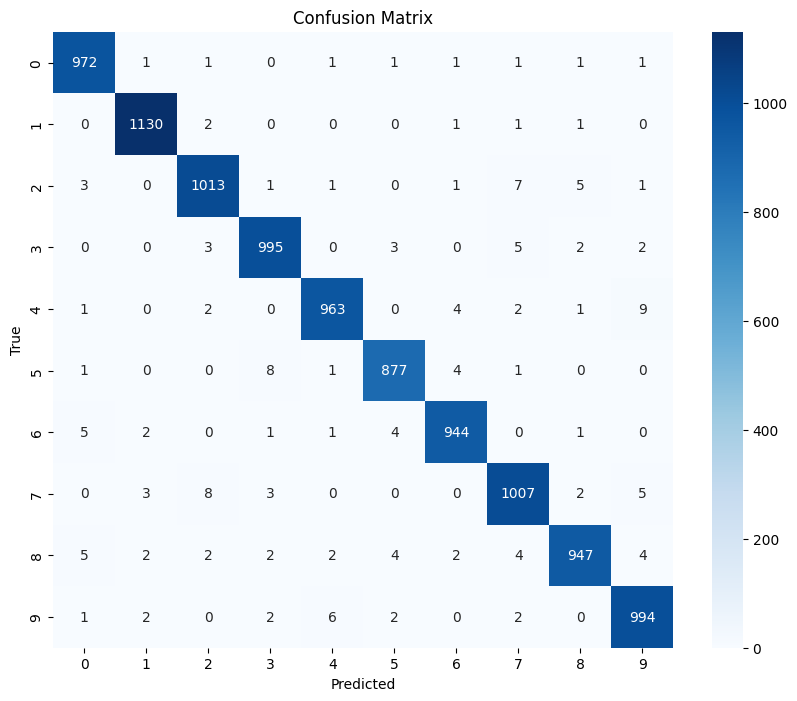

In [11]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Generate predictions (probabilities)
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert to class labels (0-9)

# Optional: Confusion Matrix (for deeper analysis)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

6. Evaluation (Test Set Performance)

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Generate predictions (probabilities)
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert to class labels (0-9)

# Optional: Confusion Matrix (for deeper analysis)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()